## abnormal model 확인

In [2]:
model_path = './abnormal_detect/RF_model(FL).pkl'
data_path = './01_M02_DC_train_pre.csv'
cols = ['ACTUALROTATIONANGLE', 'ACTUALSTEPDURATION', 'ETCHBEAMCURRENT', 'ETCHGASCHANNEL1READBACK', 
              'ETCHPBNGASREADBACK', 'ETCHSOURCEUSAGE', 'FIXTURETILTANGLE', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 
              'IONGAUGEPRESSURE']

c:\Users\ysj_1\miniconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


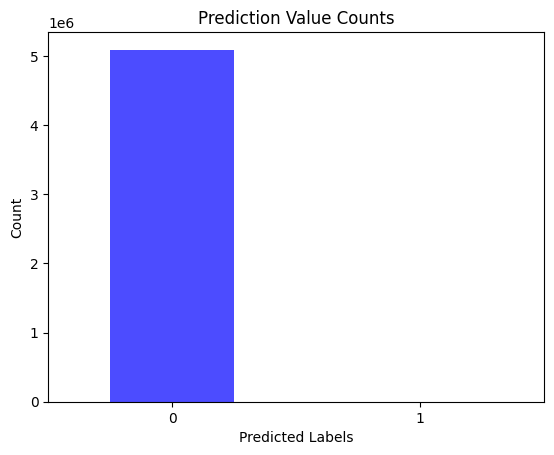

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data = pd.read_csv(data_path)
ttf_data = pd.read_csv(ttf_path)

# 2. 독립변수 선택 및 스케일링
X = data[cols]
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

# 3. 종속변수 스케일링 및 모델 학습
target_cols = ttf_data.columns.drop("time")

for target_col in target_cols:
    y = ttf_data[target_col]

    # NaN 값을 제거
    valid_idx = y.dropna().index
    X_clean = X_scaled[valid_idx]
    y_clean = y.dropna().values.reshape(-1, 1)

    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y_clean)

    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_scaled, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Train predictions
    y_train_pred_scaled = model.predict(X_train)
    y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))

    # Test predictions
    y_pred_scaled = model.predict(X_test)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred_scaled)
    test_r2 = r2_score(y_test, y_pred_scaled)

    train_mse = mean_squared_error(y_train, y_train_pred_scaled)
    test_mse = mean_squared_error(y_test, y_pred_scaled)

    print(f"Metrics for {target_col}:")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")
    print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Train RMSE: {np.sqrt(train_mse)}, Test RMSE: {np.sqrt(test_mse)}")
    print("-" * 40)

    # 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(f'Prediction for {target_col}')
    plt.legend()
    plt.show()

    # 모델 및 scaler 저장
    joblib.dump(model, f'xgb_model_for_{target_col}.pkl')
    joblib.dump(X_scaler, 'X_scaler.pkl')
    joblib.dump(y_scaler, f'y_scaler_for_{target_col}.pkl')


In [4]:
pred_counts

Predicted
0    5092264
1         91
Name: count, dtype: int64

## rul

In [1]:
data_path = './01_M02_DC_train_pre.csv'
ttf_path = './01_M02_DC_train_ttf.csv'

cols = ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT',
            'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
            'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
            'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ETCHAUX2SOURCETIMER',
            'ACTUALSTEPDURATION']

Metrics for TTF_FlowCool Pressure Dropped Below Limit:
Train R2: 0.9205996666966423, Test R2: 0.9199905424398047
Train MSE: 0.07941063194725695, Test MSE: 0.0799678731528137
Train RMSE: 0.28179892112507626, Test RMSE: 0.2827859139929245
----------------------------------------


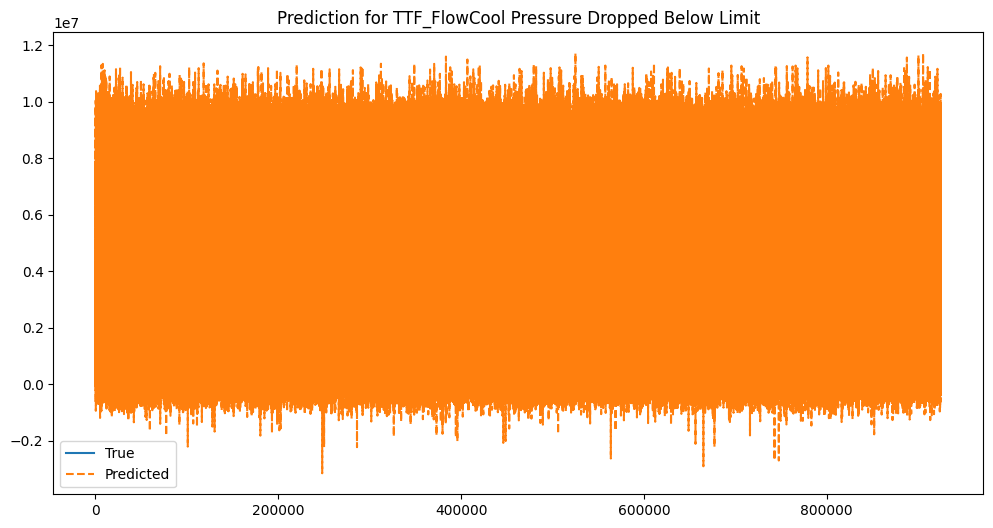

Metrics for TTF_Flowcool Pressure Too High Check Flowcool Pump:
Train R2: 0.9451643211983665, Test R2: 0.9446367212688229
Train MSE: 0.054834444375011906, Test MSE: 0.055368050132803624
Train RMSE: 0.23416755619643792, Test RMSE: 0.23530416514121383
----------------------------------------


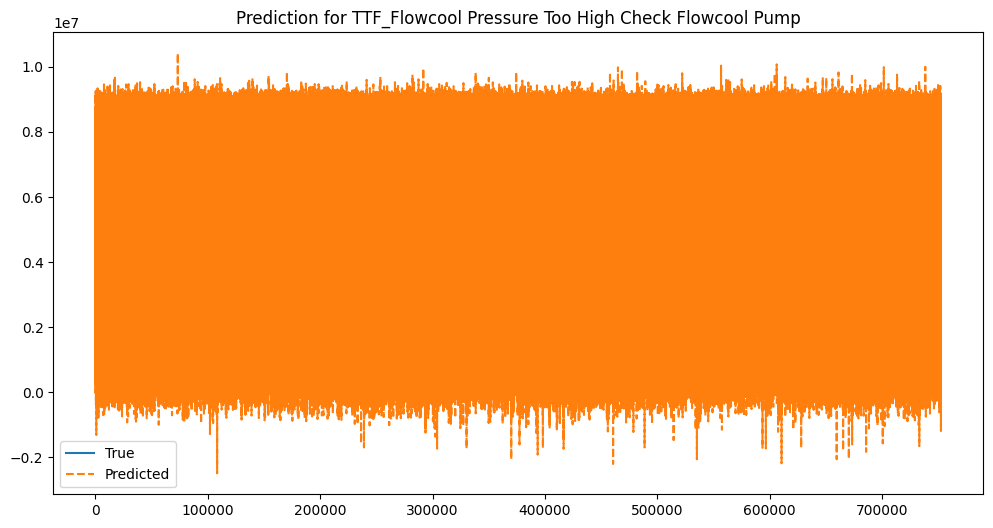

Metrics for TTF_Flowcool leak:
Train R2: 0.9264140272420257, Test R2: 0.9259116307093654
Train MSE: 0.07359251302155412, Test MSE: 0.07406182680331642
Train RMSE: 0.27127940028972736, Test RMSE: 0.27214302637274473
----------------------------------------


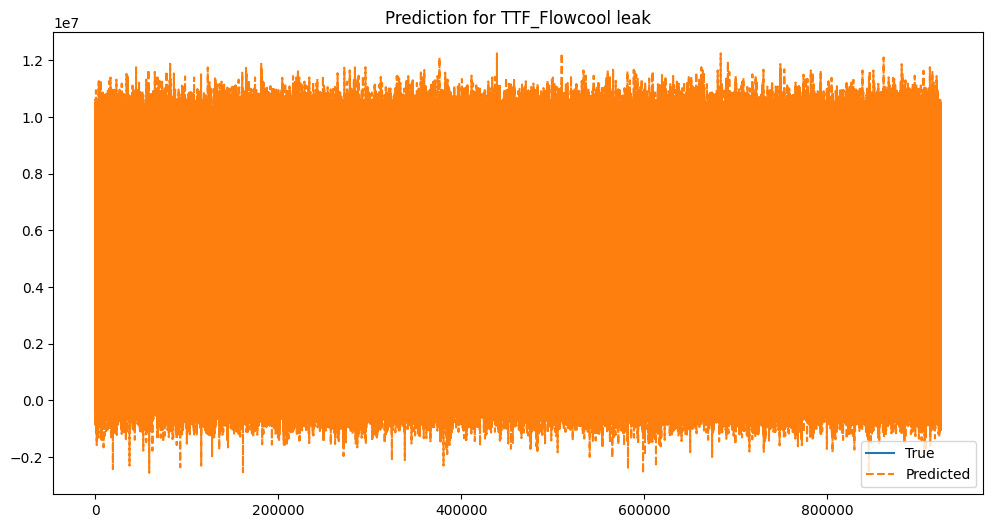

In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data = pd.read_csv(data_path)
ttf_data = pd.read_csv(ttf_path)

# 2. 독립변수 선택 및 스케일링
X = data[cols]
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

# 3. 종속변수 스케일링 및 모델 학습
target_cols = ttf_data.columns.drop("time")

for target_col in target_cols:
    y = ttf_data[target_col]

    # NaN 값을 제거
    valid_idx = y.dropna().index
    X_clean = X_scaled[valid_idx]
    y_clean = y.dropna().values.reshape(-1, 1)

    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y_clean)

    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_scaled, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Train predictions
    y_train_pred_scaled = model.predict(X_train)
    y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))

    # Test predictions
    y_pred_scaled = model.predict(X_test)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred_scaled)
    test_r2 = r2_score(y_test, y_pred_scaled)

    train_mse = mean_squared_error(y_train, y_train_pred_scaled)
    test_mse = mean_squared_error(y_test, y_pred_scaled)

    print(f"Metrics for {target_col}:")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")
    print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Train RMSE: {np.sqrt(train_mse)}, Test RMSE: {np.sqrt(test_mse)}")
    print("-" * 40)

    # 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(f'Prediction for {target_col}')
    plt.legend()
    plt.show()

    # 모델 및 scaler 저장
    joblib.dump(model, f'xgb_model_for_{target_col}.pkl')
    joblib.dump(X_scaler, 'X_scaler.pkl')
    joblib.dump(y_scaler, f'y_scaler_for_{target_col}.pkl')


In [11]:
for each in y_pred[:40]:
    print(each)

[720753.1]
[5543223.]
[1262492.1]
[1544340.1]
[2224388.2]
[5742272.]
[8394796.]
[6183814.5]
[3717433.5]
[1166088.1]
[1601396.6]
[3566386.2]
[4606575.5]
[6753362.]
[1671235.]
[5027495.]
[8204768.5]
[2773946.8]
[8429326.]
[3733289.8]
[1303428.6]
[3870669.]
[9650940.]
[5277103.]
[280491.9]
[1048067.4]
[1112630.1]
[8134293.]
[1916763.1]
[2249169.8]
[9493140.]
[6154637.5]
[3337222.2]
[4777107.]
[2807473.8]
[1131261.9]
[1209520.6]
[7919513.]
[5112986.]
[4698506.]


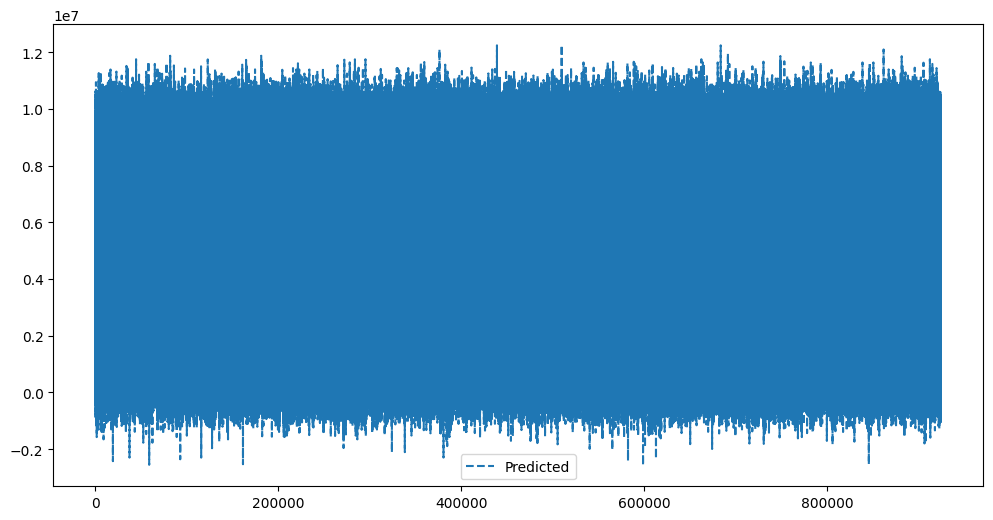

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.legend()
plt.show()